# Mall Customer Segmentation Data

In [5]:
import pandas as pd
df = pd.read_csv("Mall_customers.csv")

In [6]:
df.shape


(200, 5)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
df.isnull().sum()

# no null value present


customerid                0
gender                    0
age                       0
annual_income_(k$)        0
spending_score_(1-100)    0
cluster                   0
estimated_clv             0
dtype: int64

In [11]:
df['Gender'] = df['Gender'].str.lower().str.strip()

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
df.dtypes

customerid                 int64
gender                    object
age                        int64
annual_income_(k$)         int64
spending_score_(1-100)     int64
dtype: object

In [14]:
df['age'] = df['age'].astype(int)

In [15]:
df['annual_income_(k$)'] = df['annual_income_(k$)'].astype(int)

In [16]:
df['spending_score_(1-100)'] = df['spending_score_(1-100)'].astype(int)


In [17]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int32 
 3   annual_income_(k$)      200 non-null    int32 
 4   spending_score_(1-100)  200 non-null    int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 5.6+ KB


In [18]:
df.to_csv("Mall_customers_cleaned.csv", index=False)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_customers_cleaned.csv")


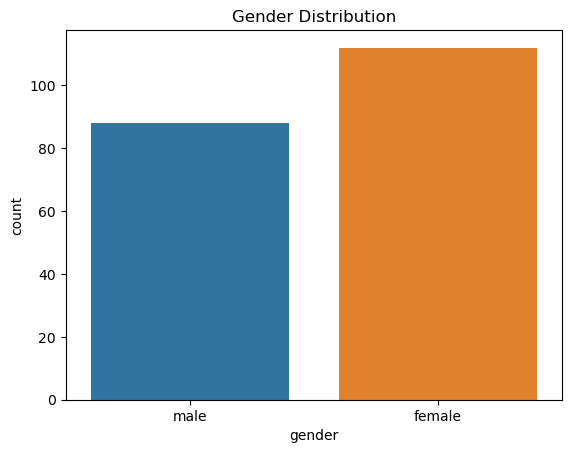

In [20]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


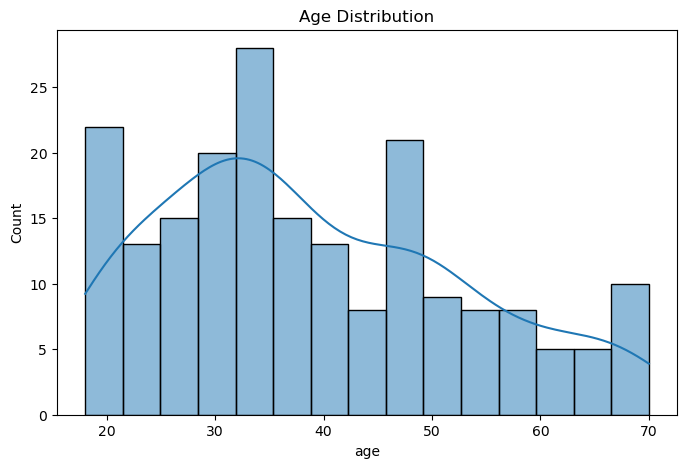

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


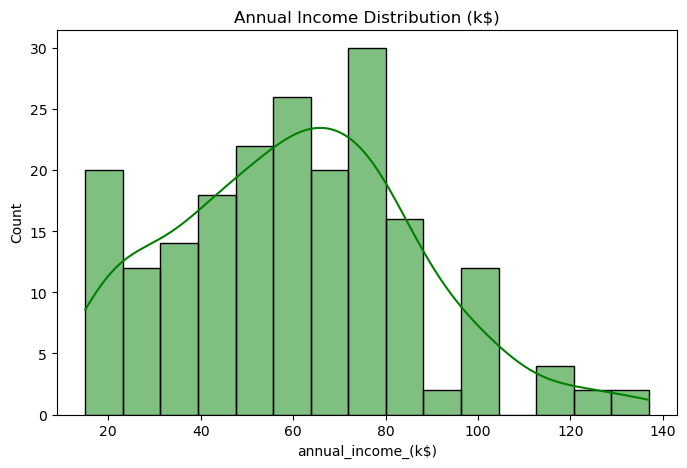

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['annual_income_(k$)'], bins=15, kde=True, color='green')
plt.title('Annual Income Distribution (k$)')
plt.show()


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


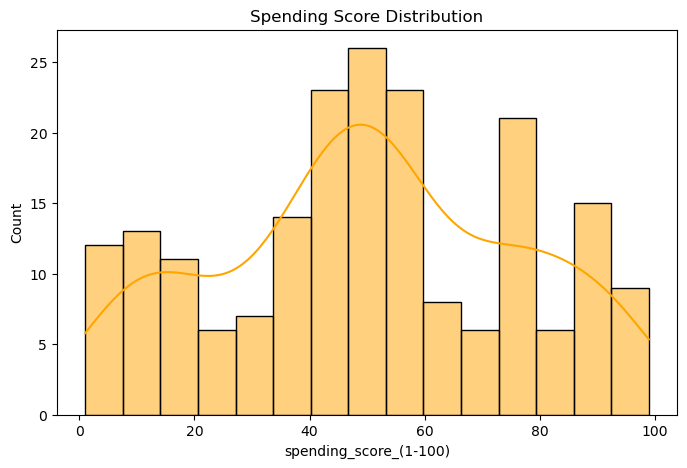

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['spending_score_(1-100)'], bins=15, kde=True, color='orange')
plt.title('Spending Score Distribution')
plt.show()


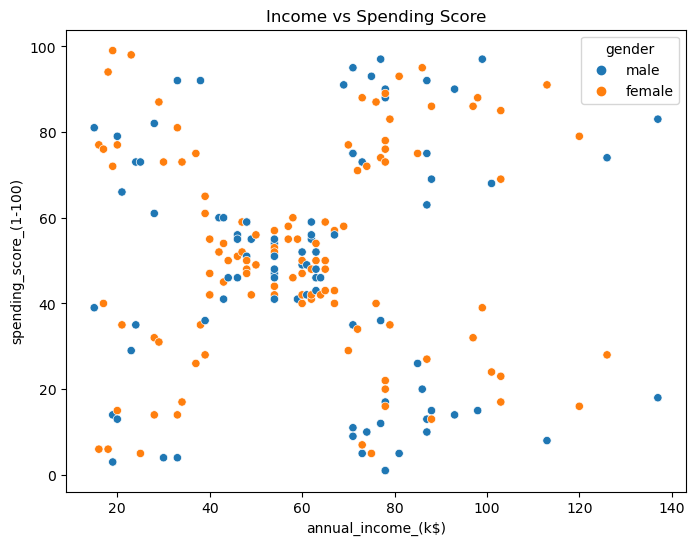

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='gender', data=df)
plt.title('Income vs Spending Score')
plt.show()


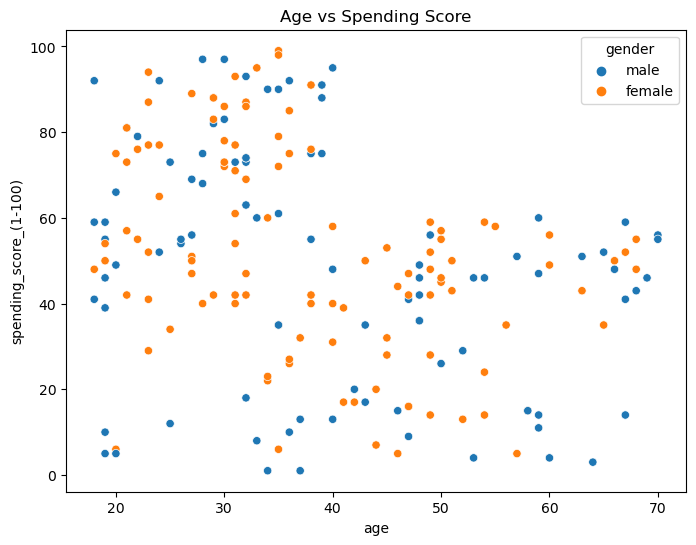

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='spending_score_(1-100)', hue='gender', data=df)
plt.title('Age vs Spending Score')
plt.show()


## Customer Segmentation Using K-Means Clustering
Group customers into clusters based on:

Age

Annual Income

Spending Score

C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


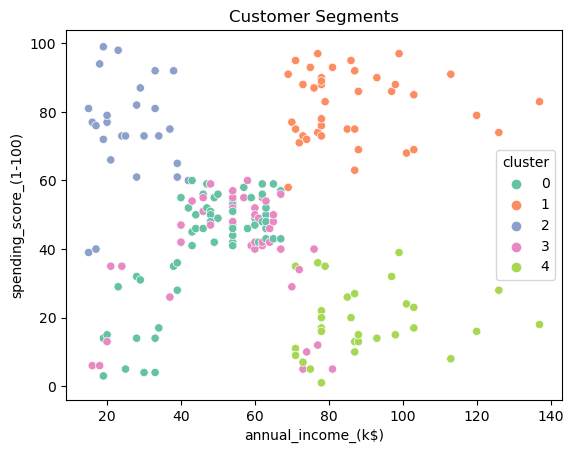

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['age', 'annual_income_(k$)', 'spending_score_(1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='cluster', palette='Set2', data=df)
plt.title('Customer Segments')
plt.show()


###  Correlation Heatmap

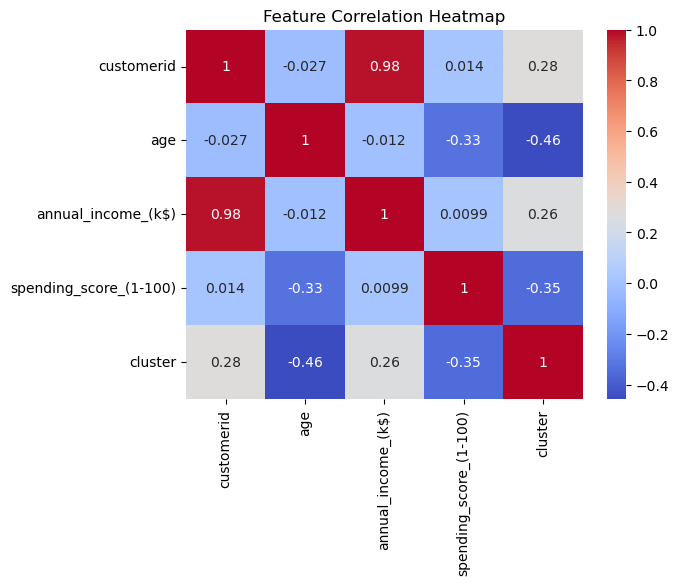

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Customer Lifetime Value (CLV) Proxy (Fake Estimate)
Estimating who might be most valuable to a business based on income and spending.

In [28]:
df['estimated_clv'] = df['annual_income_(k$)'] * df['spending_score_(1-100)']
df.sort_values(by='estimated_clv', ascending=False).head()


,customerid,gender,age,annual_income_(k$),spending_score_(1-100),cluster,estimated_clv
199,200,male,30,137,83,1,11371
193,194,female,38,113,91,1,10283
185,186,male,30,99,97,1,9603
195,196,female,35,120,79,1,9480
197,198,male,32,126,74,1,9324
